In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import locale


'nl_NL'

In [11]:
G = 9.81
sns.set_theme()
locale.setlocale(locale.LC_NUMERIC, "de_DE.UTF-8")
plt.rcParams['axes.formatter.use_locale'] = True

100


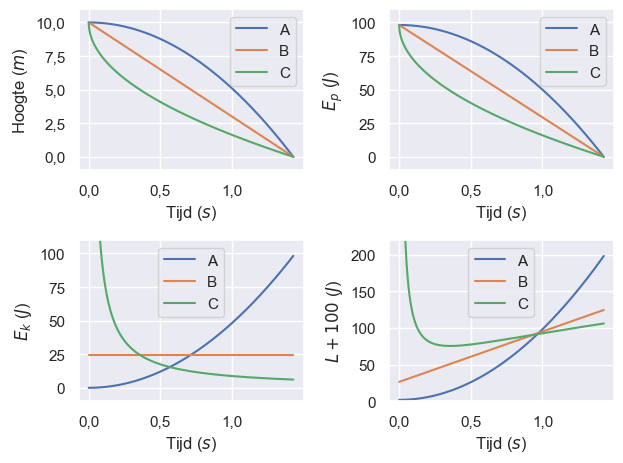

In [12]:
m = 1

h1 = 10
h2 = 0

t_end = math.sqrt((h2 - h1) / (-0.5 * G))
dt = t_end / 1000

def h(t):
    return h1 + (h2 - h1) * (t / t_end)**2

def h_bar1(t):
    return h1 + (h2 - h1) * t / t_end

def h_bar2(t):
    return h1 + (h2 - h1) * np.sqrt(t / t_end)


t = np.arange(0, t_end, dt)

fig, axs= plt.subplots(2, 2)

ax1 = axs[0, 0]
ax2 = axs[1, 0]
ax3 = axs[0, 1]
ax4 = axs[1, 1]

# ax1.set_box_aspect(1)
# ax2.set_box_aspect(1)
# ax3.set_box_aspect(1)
# ax4.set_box_aspect(1)

sns.lineplot(x=t, y=h(t), ax=ax1, label="A")
sns.lineplot(x=t, y=h_bar1(t), ax=ax1, label="B")
sns.lineplot(x=t, y=h_bar2(t), ax=ax1, label="C")
ax1.set_xlabel(r"Tijd ($s$)")
ax1.set_ylabel(r"Hoogte ($m$)")
ax1.legend()
ax1.set_ylim(h2 - 1, h1 + 1)

sns.lineplot(x=t, y=0.5 * m * ((h(t + dt) - h(t)) / dt)**2, ax=ax2, label="A")
sns.lineplot(x=t, y=0.5 * m * ((h_bar1(t + dt) - h_bar1(t)) / dt)**2, ax=ax2, label="B")
sns.lineplot(x=t, y=0.5 * m * ((h_bar2(t + dt) - h_bar2(t)) / dt)**2, ax=ax2, label="C")
ax2.set_xlabel(r"Tijd ($s$)")
ax2.set_ylabel(r"$E_k$ ($J$)")
ax2.legend()
ax2.set_ylim(-10, 110)

sns.lineplot(x=t, y=m * G * h(t), ax=ax3, label="A")
sns.lineplot(x=t, y=m * G * h_bar1(t), ax=ax3, label="B")
sns.lineplot(x=t, y=m * G * h_bar2(t), ax=ax3, label="C")
ax3.set_xlabel(r"Tijd ($s$)")
ax3.set_ylabel(r"$E_p$ ($J$)")
ax3.legend()
ax3.set_ylim(-10, 110)

L1 = 0.5 * m * ((h(t + dt) - h(t)) / dt)**2 - m * G * h(t)
L2 = 0.5 * m * ((h_bar1(t + dt) - h_bar1(t)) / dt)**2 - m * G * h_bar1(t)
L3 = 0.5 * m * ((h_bar2(t + dt) - h_bar2(t)) / dt)**2 - m * G * h_bar2(t)

lagrangian_height_offset = -round(min(np.min(L1), np.min(L2), np.min(L3)) * 1.1 / 100) * 100
print(lagrangian_height_offset)
sns.lineplot(x=t, y=L1 + lagrangian_height_offset,  ax=ax4, label="A")
sns.lineplot(x=t, y=L2 + lagrangian_height_offset,  ax=ax4, label="B")
sns.lineplot(x=t, y=L3 + lagrangian_height_offset,  ax=ax4, label="C")
ax4.set_xlabel(r"Tijd ($s$)")
ax4.set_ylabel(r"$L +" + str(lagrangian_height_offset) + "$ ($J$)")
ax4.legend()
ax4.set_ylim(0, 220)

fig.tight_layout()
plt.savefig("output/falling_ball.png")